# Лабораторная работа 1
## Вариант 1
### Работу выполнил студент группы 19-ИВТ-3 Тихонов Виктор

#### Цель:
Получение навыков работы с библиотеками анализа данных, предварительной обработки данных, средствами визуализации.

#### Задания:
1. Определите количество мужчин и женщин, которые ехали на корабле.
2. Определите какой части пассажиров удалось выжить. Посчитайте долю выживших пассажиров. 
3. Какую долю пассажиры первого класса составляли среди всех пассажиров?
4. Какого возраста были пассажиры? Посчитайте среднее и медиану возраста пассажиров. 
5. Коррелируют ли число братьев/сестер с числом родителей/детей? Посчитайте корреляцию Пирсона между признаками SibSp и Parch. Постройте плотность распределения признаков SibSp и Parch.
6. Какое самое популярное женское имя на корабле? Извлеките из полного имени пассажира (колонка Name) его личное имя (First Name). Попробуйте вручную разобрать несколько значений столбца Name и выработать правило для извлечения имен, а также разделения их на женские и мужские.
7. Коррелирует ли класс, которым ехал пассажир, с выживаемостью?
8. Визуализируйте гистограммы возраста для выживших и не выживших пассажиров. Сделайте выводы. Отобразите данные на одном и нескольких графиках
9. Визуализируйте гистограммы возраста для выживших и не выживших пассажиров по классам. Сделайте выводы. 
10. Постройте столбчатую диаграмму количества людей: мужчины, женщины, дети.

In [1]:
import pandas as pd
titanic1 = pd.read_csv('train.csv')
titanic2 = pd.read_csv('test.csv')
titanic = pd.concat([titanic1, titanic1]) #объединение двух DataFrame

###### Задание 1
Определите количество мужчин и женщин, которые ехали на корабле.

In [2]:
titanic.value_counts('Sex') #вывод количества мужчин и женщин

Sex
male      1154
female     628
dtype: int64

###### Задание 2
Определите какой части пассажиров удалось выжить. Посчитайте долю выживших пассажиров. 

In [3]:
(titanic.groupby('Survived').size() / len(titanic)).loc[1] * 100 #подсчёт доли выживших в процентах

38.38383838383838

###### Задание 3
Какую долю пассажиры первого класса составляли среди всех пассажиров?

In [4]:
(titanic.groupby('Pclass').size() / len(titanic)).loc[1] * 100 #подсчёт доли пассажиров первого класса в процентах

24.242424242424242

###### Задание 4
Какого возраста были пассажиры? Посчитайте среднее и медиану возраста пассажиров. 

In [5]:
titanic.groupby('Age').size() #возраста пассажиров

Age
0.42     2
0.67     2
0.75     4
0.83     4
0.92     2
        ..
70.00    4
70.50    2
71.00    4
74.00    2
80.00    2
Length: 88, dtype: int64

In [6]:
titanic['Age'].mean() #средний возраст пассажиров

29.69911764705882

In [7]:
titanic['Age'].median() # медиана возраста

28.0

###### Задание 5
Коррелируют ли число братьев/сестер с числом родителей/детей? Посчитайте корреляцию Пирсона между признаками SibSp и Parch. Постройте плотность распределения признаков SibSp и Parch.

In [8]:
titanic.corr(method = 'pearson')['SibSp']['Parch'] #корреляция Пирсона

0.4148376986201483

<AxesSubplot:ylabel='Density'>

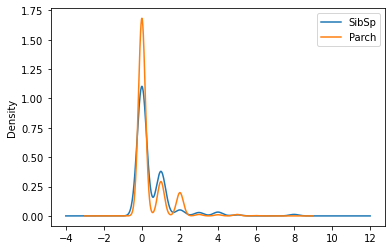

In [9]:
titanic[['SibSp', 'Parch']].plot.kde() #построение плотности распределения

###### Задание 6
Какое самое популярное женское имя на корабле? Извлеките из полного имени пассажира (колонка Name) его личное имя (First Name). Попробуйте вручную разобрать несколько значений столбца Name и выработать правило для извлечения имен, а также разделения их на женские и мужские.

In [10]:
def GetFirstName(name):
    return name.split('.')[1].split(' ')[1].strip().replace('(','') # извлечение личного имени

FirstNames = titanic['Name'].apply(GetFirstName)

titanic['First name'] = FirstNames #добавление признака 'First name'

In [11]:
_titanic = titanic[titanic['Sex'] == 'female'] # извлечение женских имён
_titanic = _titanic.groupby('First name').size() # подсчёт количества повторяющихся имён
_titanic[_titanic ==_titanic.max()] # вывод самого часто встречающегося имени

First name
William    26
dtype: int64

###### Задание 7
Коррелирует ли класс, которым ехал пассажир, с выживаемостью?

In [12]:
titanic.corr()['Pclass']['Survived']#корреляция выживаемости и класса

-0.3384810359610202

###### Задание 8
Визуализируйте гистограммы возраста для выживших и не выживших пассажиров. Сделайте выводы. Отобразите данные на одном и нескольких графиках

<AxesSubplot:>

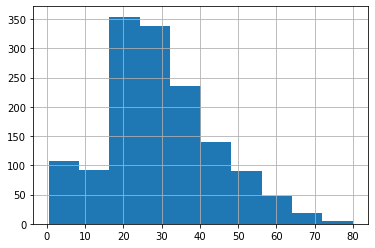

In [13]:
titanic.Age.hist() #построение гистограммы возраста всех пассажиров

<AxesSubplot:>

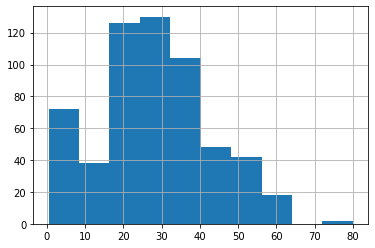

In [14]:
titanic[titanic['Survived'] == 1].Age.hist() #построение гистограммы возраста выживших

<AxesSubplot:>

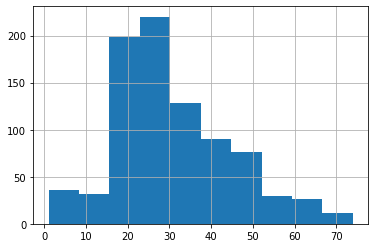

In [15]:
titanic[titanic['Survived'] == 0].Age.hist() #построение гистограммы возраста не выживших

###### Задание 9
Визуализируйте гистограммы возраста для выживших и не выживших пассажиров по классам. Сделайте выводы. 

<AxesSubplot:>

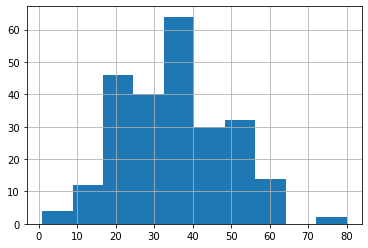

In [16]:
titanic[(titanic['Survived'] == 1) & (titanic['Pclass'] == 1)].Age.hist() #построение гистограммы возраста выживших в первом классе

<AxesSubplot:>

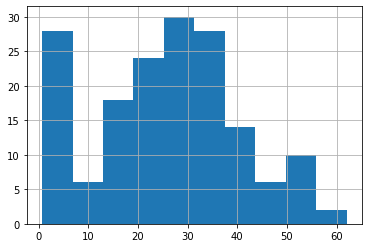

In [17]:
titanic[(titanic['Survived'] == 1) & (titanic['Pclass'] == 2)].Age.hist() #построение гистограммы возраста выживших во втором классе

<AxesSubplot:>

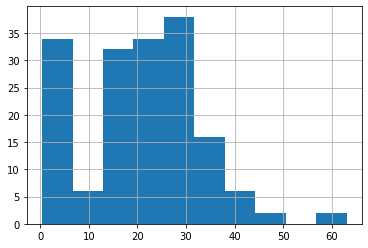

In [18]:
titanic[(titanic['Survived'] == 1) & (titanic['Pclass'] == 3)].Age.hist() #построение гистограммы возраста выживших в третьем классе

<AxesSubplot:>

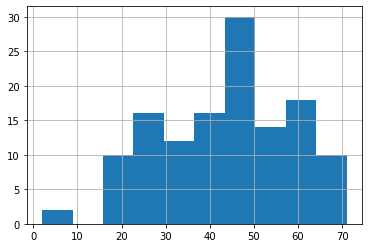

In [19]:
titanic[(titanic['Survived'] == 0) & (titanic['Pclass'] == 1)].Age.hist() #построение гистограммы возраста не выживших в первом классе

<AxesSubplot:>

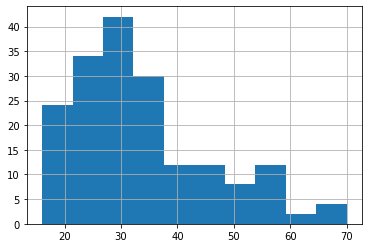

In [20]:
titanic[(titanic['Survived'] == 0) & (titanic['Pclass'] == 2)].Age.hist() #построение гистограммы возраста не выживших во втором классе

<AxesSubplot:>

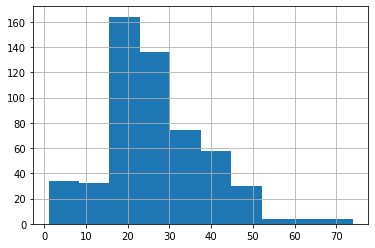

In [21]:
titanic[(titanic['Survived'] == 0) & (titanic['Pclass'] == 3)].Age.hist() #построение гистограммы возраста не выживших в третьем классе

###### Задание 10
Постройте столбчатую диаграмму количества людей: мужчины, женщины, дети.

<AxesSubplot:>

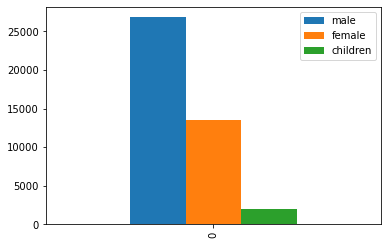

In [22]:
m_titanic = titanic[(titanic['Sex'] == 'male') & (titanic['Age'] >=18)]
m_titanic['Age'].sum()
fm_titanic = titanic[(titanic['Sex'] == 'female') & (titanic['Age'] >=18)]
fm_titanic['Age'].sum()
ch_titanic = titanic[titanic['Age'] <18]
ch_titanic['Age'].sum()

data = {'male': [m_titanic['Age'].sum()],
        'female': [fm_titanic['Age'].sum()],
        'children': [ch_titanic['Age'].sum()]}
df = pd.DataFrame(data)
df.plot(kind='bar')